In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import sys
import pickle
import seaborn as sns

sys.path.append('..')

import warnings
warnings.filterwarnings("ignore")

In [9]:
from simulations.scenarios import *
from simulations.parse_enron import Message

In [10]:
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")
sns.set_palette('colorblind', n_colors=4)

In [16]:
parsed_logs_folder = 'Enron/parsing/'
social_graph = pickle.load(open(parsed_logs_folder + "social.pkl", "rb"))
log = pickle.load(open(parsed_logs_folder + "replay_log.pkl", "rb"))[:5000]

In [12]:
context = Context(log, social_graph)

In [13]:
def visualize_propagation(scenario_name, kp, hp=None):
    kp = kp[['Stale', 'Updated']]
    
    kp.plot.area()
    plt.legend(frameon=True)
    plt.title("%s — Encryption keys propagation" % scenario_name)
    plt.xlabel("Emails sent")
    plt.ylabel("Link Key status")
    
    plt.savefig(scenario_name.lower().replace(' ', '_') + '_key_propagation.pdf')

    if hp is not None:
        hp = hp[['Stale', 'Updated']]
        hp.plot.area()
        plt.legend(frameon=True)
        plt.title("%s — Head propagation" % scenario_name)
        plt.xlabel("Emails sent")
        plt.ylabel("Link Head status")

        plt.savefig(scenario_name.lower().replace(' ', '_') + '_head_propagation.pdf')

In [14]:
def visualize_encryption_status_history(scenario_name, es, batch_size=500):
    batch_stats_data = pd.DataFrame(columns=['Stale key', 'Encrypted', 'Plaintext'])
    for i in range(0, len(es), batch_size):
        batch = es[i:i+batch_size].dropna()
        batch_stats = batch.value_counts()
        if len(batch_stats) == 0:
            continue
            
        batch_stats_data.loc[i] = list(
            batch_stats[[EncStatus.stale, EncStatus.encrypted, EncStatus.plaintext]] \
            / batch_stats.sum() * 100)

    batch_stats_data.plot.area()

    plt.legend(frameon=True)
    plt.title("%s — Encryption status" % scenario_name)
    plt.xlabel("Email sent")
    plt.ylabel("Emails traffic, %")
    plt.ylim(0, 100)
    
    plt.savefig(scenario_name.lower().replace(' ', '_') + '_traffic.pdf')

In [ ]:
with SimulationParams().as_default():
    encryption_status_data, sender_cache_data, recipient_store_data, bandwidth_data = \
            simulate_public_claimchain(context)

Simulating the ClaimChain with public claims:
SimulationParams(chain_update_buffer_size=5, key_update_every_nb_sent_emails=None)


../claimchain/state.py:102: UserWarning: VRF for brent.hendry@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for jeffrey.hodge@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for butch.russell@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for frank.sayre@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for janice.moore@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for peter.keohane@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for richard.sanders@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for morris.clark@en

../claimchain/state.py:102: UserWarning: VRF for carol.clair@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for bob.shults@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for louise.kitchen@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for christian.yoder@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for bhutt@ankarcapital.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for kdleitao@llgm.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for caroline.abramo@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for eleanor.fraser@enron

../claimchain/state.py:102: UserWarning: VRF for jake.thomas@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for cliff.baxter@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for wes.colwell@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for anthony.campos@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for reggie.wilson@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for lyn.malina@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for riccardo.bortolotti@enron.com not computed. Skipping adding a capability.
  % claim_label)
../claimchain/state.py:102: UserWarning: VRF for jay.fitzgerald

In [ ]:
visualize_encryption_status_history('Claimchain without privacy', encryption_status_data)

In [267]:
with SimulationParams(key_update_every_nb_sent_emails=None).as_default():
    ac_hp, ac_es = simulate_autocrypt(context)

Simulating Autocrypt:
SimulationParams(mode='dummy', chain_update_buffer_size=None, key_update_every_nb_sent_emails=None)
Keys.   Updated: 381, Stale: 0
Emails. Sent: 4408, Encrypted: 3073


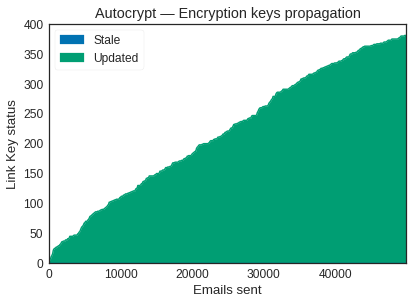

In [268]:
visualize_propagation('Autocrypt', ac_hp)
plt.show()

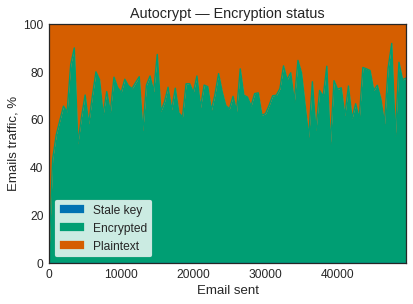

In [269]:
visualize_encryption_status_history('Autocrypt', ac_es)
plt.show()

In [270]:
with SimulationParams(key_update_every_nb_sent_emails=50).as_default():
    dyn_ac_hp, dyn_ac_es = simulate_autocrypt(context)

Simulating Autocrypt:
SimulationParams(mode='dummy', chain_update_buffer_size=None, key_update_every_nb_sent_emails=50)
Keys.   Updated: 69, Stale: 312
Emails. Sent: 4408, Encrypted: 801


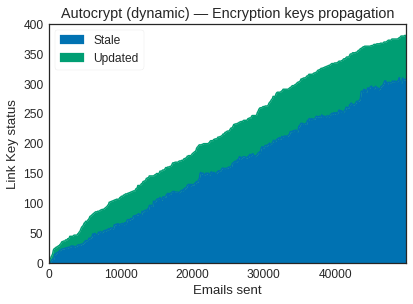

In [271]:
visualize_propagation('Autocrypt (dynamic)', dyn_ac_hp)
plt.show()

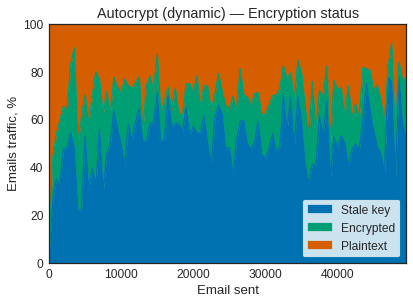

In [272]:
visualize_encryption_status_history('Autocrypt (dynamic)', dyn_ac_es)
plt.show()

In [273]:
static_params = SimulationParams(key_update_every_nb_sent_emails=None, chain_update_buffer_size=5)
dynamic_params = SimulationParams(key_update_every_nb_sent_emails=50, chain_update_buffer_size=5)

In [274]:
with static_params.as_default():
    cc_pub_kp, cc_pub_hp, cc_pub_es = simulate_claimchain_no_privacy(context)

Simulating the ClaimChain with public claims:
SimulationParams(mode='dummy', chain_update_buffer_size=5, key_update_every_nb_sent_emails=None)
Keys:   Updated: 340, Stale: 0
Heads:  Updated: 65, Stale: 275
Emails: Sent: 4408, Encrypted: 1459


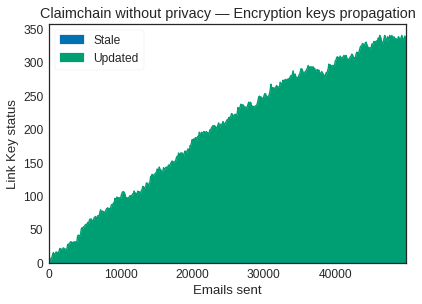

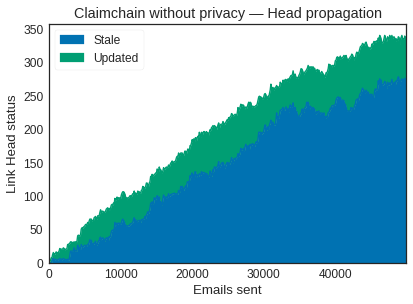

In [275]:
visualize_propagation('Claimchain without privacy', cc_pub_kp, cc_pub_hp)
plt.show()

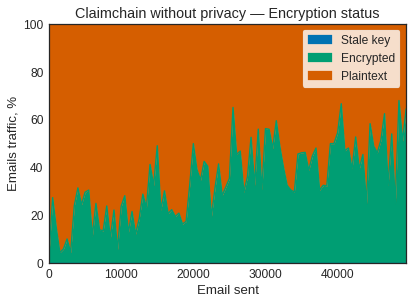

In [276]:
visualize_encryption_status_history('Claimchain without privacy', cc_pub_es)
plt.show()

In [257]:
with dynamic_params.as_default():
    dyn_cc_pub_kp, dyn_cc_pub_hp, dyn_cc_pub_es = simulate_claimchain_no_privacy(context)

Simulating the ClaimChain with public claims:
SimulationParams(mode='dummy', chain_update_buffer_size=5, key_update_every_nb_sent_emails=50)
Keys:   Updated: 82, Stale: 263
Heads:  Updated: 33, Stale: 312
Emails: Sent: 4408, Encrypted: 515


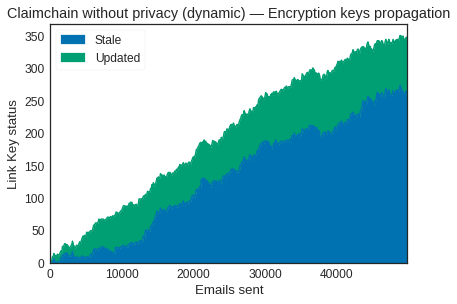

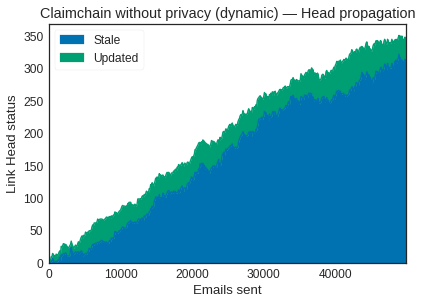

In [258]:
visualize_propagation('Claimchain without privacy (dynamic)', dyn_cc_pub_kp, dyn_cc_pub_hp)
plt.show()

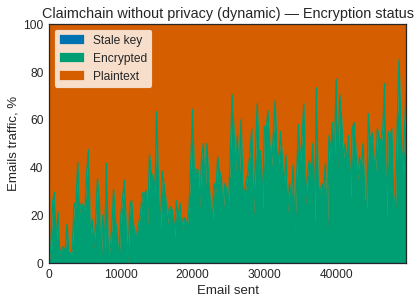

In [259]:
visualize_encryption_status_history('Claimchain without privacy (dynamic)', cc_pub_es)
plt.show()

In [260]:
with static_params.as_default():
    cc_priv_kp, cc_priv_hp, cc_priv_es = simulate_claimchain_with_privacy(context)

Simulating ClaimChain with private claims and introductions:
SimulationParams(mode='dummy', chain_update_buffer_size=5, key_update_every_nb_sent_emails=None)
Keys:   Updated: 347, Stale: 0
Heads:  Updated: 97, Stale: 250
Emails: Sent: 3792, Encrypted: 2232


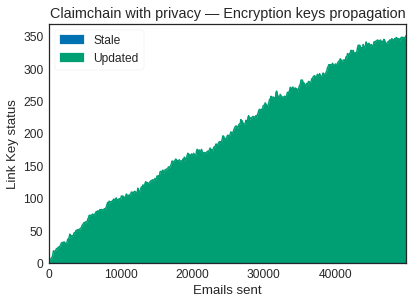

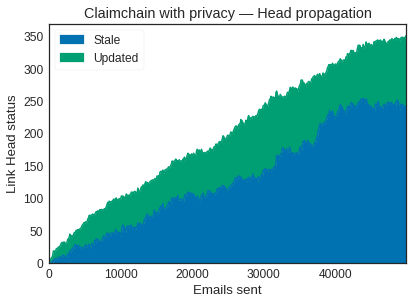

In [261]:
visualize_propagation('Claimchain with privacy', cc_priv_kp, cc_priv_hp)

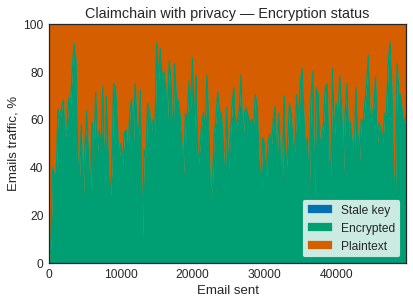

In [262]:
visualize_encryption_status_history('Claimchain with privacy', cc_priv_es)
plt.show()

In [263]:
with dynamic_params.as_default():
    dyn_cc_priv_kp, dyn_cc_priv_hp, dyn_cc_priv_es = simulate_claimchain_with_privacy(context)

Simulating ClaimChain with private claims and introductions:
SimulationParams(mode='dummy', chain_update_buffer_size=5, key_update_every_nb_sent_emails=50)
Keys:   Updated: 61, Stale: 293
Heads:  Updated: 35, Stale: 319
Emails: Sent: 3792, Encrypted: 712


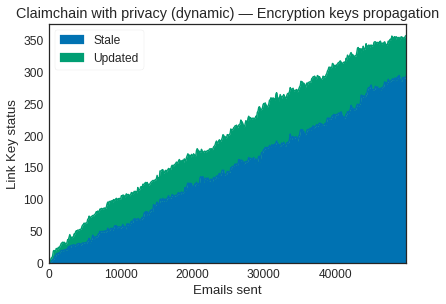

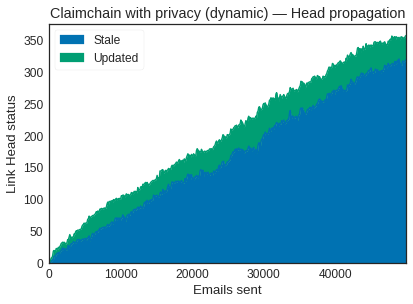

In [264]:
visualize_propagation('Claimchain with privacy (dynamic)', dyn_cc_priv_kp, dyn_cc_priv_hp)

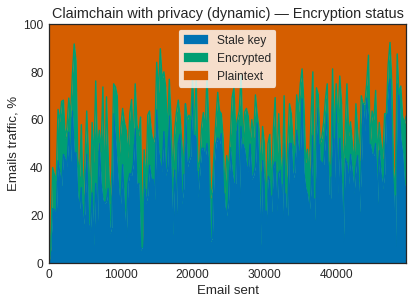

In [265]:
visualize_encryption_status_history('Claimchain with privacy (dynamic)', dyn_cc_priv_es)
plt.show()